In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import detection as dtc
from constants import E_th
from tqdm import tqdm

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [19]:
detectors = ['Hyper-k', 'DUNE', 'JUNO']

In [47]:
size = 200

E_detec = np.linspace(0, 100, size)

In [351]:
E_true[35]*2

35.175879396984925

100%|██████████| 200/200 [00:00<00:00, 64867.06it/s]


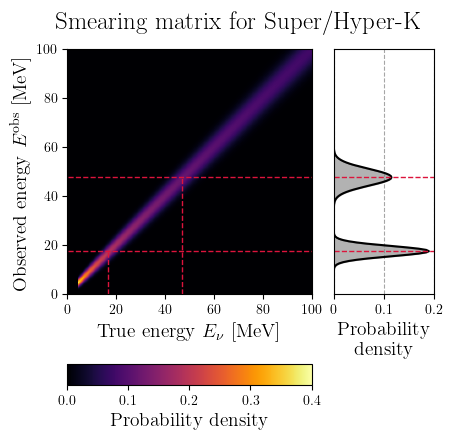

In [354]:
fig = plt.figure(figsize=(10,7))
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=-0.1,
#                     hspace=0.4)
detector = detectors[0]
E_true = np.linspace(0, 100, size)

smear = np.zeros((size, size))

for j in tqdm(range(size)):
    if E_true[j] >= E_th[detector]:
        smear[:,j] = dtc.resolution_detector(E_detec, E_true[j], detector)

plt.subplot(2,2,1)
im = plt.imshow(smear, origin="lower", cmap = 'inferno', vmax = 0.4, vmin = 0)
plt.xlabel(r'True energy $E_{\nu}$ [MeV]', fontsize = 14)
plt.ylabel(r'Observed energy $E^{\mathrm{obs}}$ [MeV]', fontsize = 14)
plt.xlim(-0.5, 199.5)
plt.xticks([40*i-0.5 for i in range(6)], labels = [20*i for i in range(6)])
plt.ylim(-0.5, 199.5)
plt.yticks([40*i-0.5 for i in range(6)], labels = [20*i for i in range(6)])
plt.vlines(93, 0, 95, color = 'crimson', ls = '--', lw = 1)
plt.hlines(95, 0, 200, color = 'crimson', ls = '--', lw = 1)
plt.vlines(33, 0, 35, color = 'crimson', ls = '--', lw = 1)
plt.hlines(35, 0, 200, color = 'crimson', ls = '--', lw = 1)
fig.text(0.35, 0.91, 'Smearing matrix for Super/Hyper-K', fontsize = 18, ha = 'center')

plt.subplot(2,2,3)
# cbar = plt.colorbar(im, orientation = 'horizontal', shrink = 0.52, pad=0.13)
a = np.array([[0,0.4]])
img = plt.imshow(a, cmap="inferno")
plt.gca().set_visible(False)
cax = plt.axes([0.178, 0.4, 0.245, 0.03])
cbar = plt.colorbar(orientation="horizontal", cax = cax)
cbar.ax.set_xlabel('Probability density', fontsize = 14)

plt.subplot(2,2,2)
plt.gca().set_visible(False)
cax2 = plt.axes([0.445, 0.53, 0.1, 0.35])
cax2.grid(True, color = 'grey', alpha = 0.7, ls = '--')
cax2.plot(dtc.resolution_detector(E_detec, E_true[95], detector), E_detec, color = 'black')
cax2.fill_between(dtc.resolution_detector(E_detec, E_true[95], detector), E_detec, color = 'black', alpha = 0.3)
cax2.plot(dtc.resolution_detector(E_detec, E_true[35], detector), E_detec, color = 'black')
cax2.fill_between(dtc.resolution_detector(E_detec, E_true[35], detector), E_detec, color = 'black', alpha = 0.3)
cax2.set_ylim(0, 100)
cax2.set_yticks([])
cax2.set_xlim(0, 0.2)
cax2.set_xticks([0,0.1,0.2])
cax2.set_xticklabels([0,0.1,0.2])
cax2.axhline(E_true[95], color = 'crimson', ls = '--', lw = 1)
cax2.axhline(E_true[35], color = 'crimson', ls = '--', lw = 1)
cax2.set_xlabel('Probability \n density', fontsize = 14)
    
plt.savefig('Plots/Smearing_matrix_super-hyper-k.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('Plots/Smearing_matrix_super-hyper-k.svg', dpi = 300, bbox_inches = 'tight')
# plt.show()

In [15]:
smear = np.zeros((size, size))

In [16]:
for i in tqdm(range(size)):
    smear[i,:] = dtc.resolution_detector(E_detec, E_true[i], detector)

100%|██████████| 1000/1000 [00:00<00:00, 38604.17it/s]


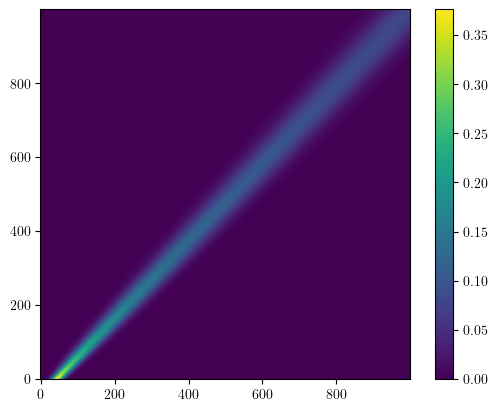

In [18]:
plt.imshow(smear, origin="lower")
plt.colorbar()